<a href="https://colab.research.google.com/github/Maximiliano-Rodriguez-M/Aprendizaje-de-AI/blob/main/CNN/clasificacion_de_ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

Fashion MNIST Dataset

In [ ]:
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

se define una lista dandole nombres a las etiquetas

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Preprocesamiento de datos

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


indice de la imagen

In [ ]:
index = 11

Escalar las imágenes para normalizar los valores de píxeles

In [ ]:
image = train_images[index]
label = train_labels[index]

representacion de la imagen en una matriz

In [ ]:
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  39 111  93  85
   27   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0 190 244 248 255
  255 155 202 212 150   9   0   3   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0 213 227 233 227
  243 246 255 250 255 146   0   9   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   6 244 233 236 244
  232 214 248 242 251  33   0   7   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   6   0  72 255 231 239 244
  237 226 255 252 207  44  24   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 125 231 215 253 252
  234 246 254 239 128 114  63   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0 189 230 198 185 219
  218 255 206 255 133  31   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0 224 241 255 236 237
  223 191 219 166   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0  61 245 202 22

se muestra la imagen

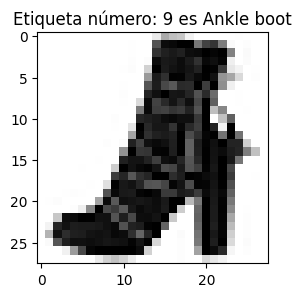

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.Greys)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

Preprocesamiento de datos

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

Red neuronal convolucional

In [ ]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


tasa de aprendizaje

In [ ]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

entrenamiento

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.7426 - loss: 0.6927 - val_accuracy: 0.8711 - val_loss: 0.3646
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8825 - loss: 0.3232 - val_accuracy: 0.8825 - val_loss: 0.3284
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9006 - loss: 0.2741 - val_accuracy: 0.8878 - val_loss: 0.2991
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9112 - loss: 0.2370 - val_accuracy: 0.9016 - val_loss: 0.2669
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9215 - loss: 0.2104 - val_accuracy: 0.8989 - val_loss: 0.2790
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9282 - loss: 0.1922 - val_accuracy: 0.9094 - val_loss: 0.2520
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9367 - loss: 0.1707 - val_accuracy: 0.9075 - val_loss: 0.2546
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9405 -

Evaluación

In [ ]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - 8ms/step - accuracy: 0.9098 - loss: 0.2687


prediccion

In [ ]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


calculo matriz confucion

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

visualizacion de matriz confucion

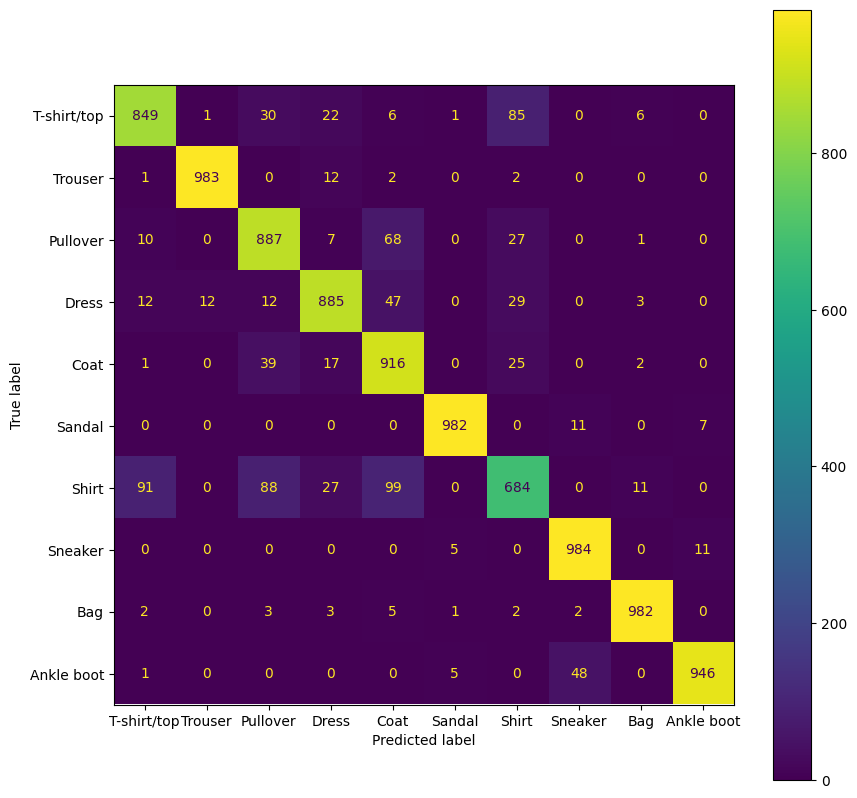

In [ ]:
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

codigo para definir que es cada imagen

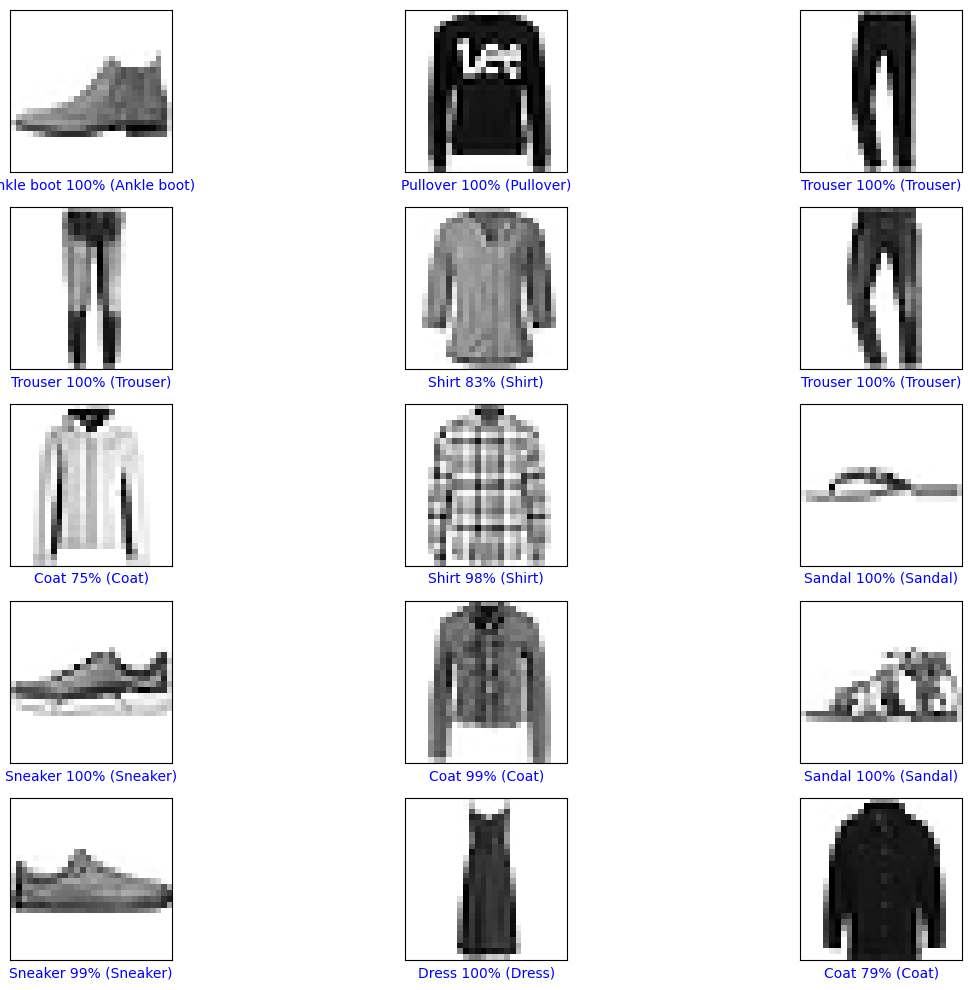

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()